In [1]:
import os
from datetime import datetime
import pandas as  pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

from src.dataset import prep_dataloader
from src.model import NeuralNetwork
from src.training import train, test
from src.evaluation import create_loss_label_df, cal_threshold, predict, show_confusion_matrix

In [2]:
# config
# path
tr_path = '../../data/processed/training-set.csv'
val_path = '../../data/processed/validation-set.csv'
tt_path = '../../data/processed/testing-set.csv'
log_path = '../../logs/anomaly_detection'
model_path = '../../models/anomaly_detection/model_weights.pth'

# hyperparameter
batch_size = 64

In [3]:
# prepare dataloader
normal_tr_dl = prep_dataloader(
    tr_path,
    batch_size,
    shuffle=True,
    mode='normal'
)

normal_val_dl = prep_dataloader(
    val_path,
    batch_size,
    shuffle=False,
    mode='normal'
)

normal_tt_dl = prep_dataloader(
    tt_path,
    batch_size,
    shuffle=False,
    mode='normal'
)

all_tr_dl = prep_dataloader(
    tr_path,
    batch_size,
    shuffle=False,
    mode='all'
)

all_val_dl = prep_dataloader(
    val_path,
    batch_size,
    shuffle=False,
    mode='all'
)

all_tt_dl = prep_dataloader(
    tt_path,
    batch_size,
    shuffle=False,
    mode='all'
)

Finished reading the training set (normal) of Dataset (59584 samples found, each dim = 196)
Finished reading the validation set (normal) of Dataset (14753 samples found, each dim = 196)
Finished reading the testing set (normal) of Dataset (18663 samples found, each dim = 196)
Finished reading the training set (all) of Dataset (164910 samples found, each dim = 196)
Finished reading the validation set (all) of Dataset (41228 samples found, each dim = 196)
Finished reading the testing set (all) of Dataset (51535 samples found, each dim = 196)


In [4]:
# training and validation
# device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# summary writer
last_log_path = os.path.join(log_path, datetime.now().strftime("%Y-%m-%d_%H-%M-%S"))
writer = SummaryWriter(last_log_path)

# neural network
model = NeuralNetwork().to(device)

# load model weight
if os.path.isfile(model_path):
    print(f'Load model weights form {model_path}')
    model.load_state_dict(torch.load(model_path))

# loss func and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

min_loss = 1000

# training and validation
epochs = 100
for t in range(epochs):
    ep = t + 1
    print(f"Epoch {ep}")
    tr_loss = train(normal_tr_dl, model, loss_fn, optimizer, device)
    val_loss = test(normal_val_dl, model, loss_fn, device)
    
    # log loss and acc
    writer.add_scalar('Loss/train', tr_loss, ep)
    writer.add_scalar('Loss/val', val_loss, ep)
    
    # save best model by min val loss
    if val_loss < min_loss:
        print(f'Saving model to {model_path}\n')
        torch.save(model.state_dict(), model_path)
        min_loss = val_loss

print("Done!")

Using cuda device
Epoch 1


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.038916 

[Test] Avg loss: 0.010395 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 2


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.006564 

[Test] Avg loss: 0.004597 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 3


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.004345 

[Test] Avg loss: 0.003495 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 4


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.003466 

[Test] Avg loss: 0.003027 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 5


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.002865 

[Test] Avg loss: 0.002355 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 6


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.002531 

[Test] Avg loss: 0.002307 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 7


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.002239 

[Test] Avg loss: 0.002076 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 8


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001979 

[Test] Avg loss: 0.001935 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 9


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001860 

[Test] Avg loss: 0.001526 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 10


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001786 

[Test] Avg loss: 0.001731 

Epoch 11


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001634 

[Test] Avg loss: 0.001462 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 12


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001668 

[Test] Avg loss: 0.001262 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 13


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001594 

[Test] Avg loss: 0.001303 

Epoch 14


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001458 

[Test] Avg loss: 0.001202 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 15


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001449 

[Test] Avg loss: 0.002406 

Epoch 16


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001382 

[Test] Avg loss: 0.001349 

Epoch 17


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001390 

[Test] Avg loss: 0.001155 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 18


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001388 

[Test] Avg loss: 0.001172 

Epoch 19


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001346 

[Test] Avg loss: 0.001122 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 20


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001183 

[Test] Avg loss: 0.001319 

Epoch 21


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001307 

[Test] Avg loss: 0.001111 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 22


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001163 

[Test] Avg loss: 0.001123 

Epoch 23


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001235 

[Test] Avg loss: 0.001061 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 24


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001171 

[Test] Avg loss: 0.001506 

Epoch 25


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001152 

[Test] Avg loss: 0.000928 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 26


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001042 

[Test] Avg loss: 0.000996 

Epoch 27


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001152 

[Test] Avg loss: 0.000912 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 28


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001331 

[Test] Avg loss: 0.001367 

Epoch 29


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001007 

[Test] Avg loss: 0.000820 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 30


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000997 

[Test] Avg loss: 0.000844 

Epoch 31


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000988 

[Test] Avg loss: 0.000802 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 32


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000999 

[Test] Avg loss: 0.000977 

Epoch 33


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000947 

[Test] Avg loss: 0.002263 

Epoch 34


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.001015 

[Test] Avg loss: 0.000756 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 35


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000995 

[Test] Avg loss: 0.000719 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 36


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000947 

[Test] Avg loss: 0.000763 

Epoch 37


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000848 

[Test] Avg loss: 0.000973 

Epoch 38


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000879 

[Test] Avg loss: 0.000753 

Epoch 39


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000860 

[Test] Avg loss: 0.000686 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 40


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000807 

[Test] Avg loss: 0.000727 

Epoch 41


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000819 

[Test] Avg loss: 0.000734 

Epoch 42


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000847 

[Test] Avg loss: 0.001552 

Epoch 43


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000791 

[Test] Avg loss: 0.000594 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 44


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000685 

[Test] Avg loss: 0.000703 

Epoch 45


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000743 

[Test] Avg loss: 0.001026 

Epoch 46


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000720 

[Test] Avg loss: 0.000645 

Epoch 47


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000695 

[Test] Avg loss: 0.000612 

Epoch 48


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000698 

[Test] Avg loss: 0.000657 

Epoch 49


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000629 

[Test] Avg loss: 0.000544 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 50


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000720 

[Test] Avg loss: 0.000524 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 51


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000720 

[Test] Avg loss: 0.001025 

Epoch 52


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000621 

[Test] Avg loss: 0.000574 

Epoch 53


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000664 

[Test] Avg loss: 0.001180 

Epoch 54


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000643 

[Test] Avg loss: 0.000498 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 55


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000604 

[Test] Avg loss: 0.001097 

Epoch 56


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000685 

[Test] Avg loss: 0.000483 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 57


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000632 

[Test] Avg loss: 0.000690 

Epoch 58


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000616 

[Test] Avg loss: 0.000466 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 59


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000581 

[Test] Avg loss: 0.000532 

Epoch 60


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000686 

[Test] Avg loss: 0.000501 

Epoch 61


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000574 

[Test] Avg loss: 0.001315 

Epoch 62


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000615 

[Test] Avg loss: 0.000431 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 63


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000640 

[Test] Avg loss: 0.000466 

Epoch 64


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000554 

[Test] Avg loss: 0.000636 

Epoch 65


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000609 

[Test] Avg loss: 0.000478 

Epoch 66


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000580 

[Test] Avg loss: 0.000405 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 67


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000632 

[Test] Avg loss: 0.000407 

Epoch 68


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000506 

[Test] Avg loss: 0.000448 

Epoch 69


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000549 

[Test] Avg loss: 0.000533 

Epoch 70


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000625 

[Test] Avg loss: 0.000455 

Epoch 71


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000545 

[Test] Avg loss: 0.000370 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 72


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000537 

[Test] Avg loss: 0.000471 

Epoch 73


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000510 

[Test] Avg loss: 0.000388 

Epoch 74


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000545 

[Test] Avg loss: 0.000487 

Epoch 75


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000513 

[Test] Avg loss: 0.000450 

Epoch 76


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000588 

[Test] Avg loss: 0.000670 

Epoch 77


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000565 

[Test] Avg loss: 0.000421 

Epoch 78


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000507 

[Test] Avg loss: 0.000487 

Epoch 79


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000550 

[Test] Avg loss: 0.000471 

Epoch 80


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000488 

[Test] Avg loss: 0.001214 

Epoch 81


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000544 

[Test] Avg loss: 0.000563 

Epoch 82


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000511 

[Test] Avg loss: 0.000480 

Epoch 83


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000493 

[Test] Avg loss: 0.001241 

Epoch 84


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000500 

[Test] Avg loss: 0.000653 

Epoch 85


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000551 

[Test] Avg loss: 0.000477 

Epoch 86


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000467 

[Test] Avg loss: 0.000368 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 87


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000458 

[Test] Avg loss: 0.000519 

Epoch 88


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000487 

[Test] Avg loss: 0.000354 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 89


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000447 

[Test] Avg loss: 0.000417 

Epoch 90


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000476 

[Test] Avg loss: 0.000402 

Epoch 91


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000469 

[Test] Avg loss: 0.000692 

Epoch 92


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000474 

[Test] Avg loss: 0.000395 

Epoch 93


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000556 

[Test] Avg loss: 0.000340 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 94


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000417 

[Test] Avg loss: 0.000329 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 95


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000481 

[Test] Avg loss: 0.000316 

Saving model to ../../models/anomaly_detection/model_weights.pth

Epoch 96


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000522 

[Test] Avg loss: 0.000419 

Epoch 97


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000419 

[Test] Avg loss: 0.000347 

Epoch 98


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000447 

[Test] Avg loss: 0.000455 

Epoch 99


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000471 

[Test] Avg loss: 0.000400 

Epoch 100


  0%|          | 0/931 [00:00<?, ?it/s]

[Train] Avg loss: 0.000424 

[Test] Avg loss: 0.000371 

Done!


In [5]:
# testing
tt_loss = test(normal_tt_dl, model, loss_fn, device)
writer.add_scalar('Loss/test', tt_loss, 1)

[Test] Avg loss: 0.000377 



In [6]:
tr_df = create_loss_label_df(model, all_tr_dl, device)
val_df = create_loss_label_df(model, all_val_dl, device)
tt_df = create_loss_label_df(model, all_tt_dl, device)

tr_threshold = cal_threshold(tr_df)

tr_pred = predict(tr_df['loss'].values, tr_threshold)
val_pred = predict(val_df['loss'].values, tr_threshold)
tt_pred = predict(tt_df['loss'].values, tr_threshold)

In [7]:
print(f'threshold: {tr_threshold}\n')

print('training dataset\n')
print(classification_report(tr_df['label'].values, tr_pred))

print('validation dataset\n')
print(classification_report(val_df['label'].values, val_pred))

print('testing dataset\n')
print(classification_report(tt_df['label'].values, tt_pred))

threshold: 0.0018388032913208008

training dataset

              precision    recall  f1-score   support

           0       0.66      0.96      0.78     59584
           1       0.97      0.72      0.83    105326

    accuracy                           0.81    164910
   macro avg       0.82      0.84      0.80    164910
weighted avg       0.86      0.81      0.81    164910

validation dataset

              precision    recall  f1-score   support

           0       0.66      0.96      0.78     14753
           1       0.97      0.72      0.83     26475

    accuracy                           0.81     41228
   macro avg       0.82      0.84      0.81     41228
weighted avg       0.86      0.81      0.81     41228

testing dataset

              precision    recall  f1-score   support

           0       0.66      0.96      0.78     18663
           1       0.97      0.72      0.83     32872

    accuracy                           0.81     51535
   macro avg       0.82      0.84      

training dataset



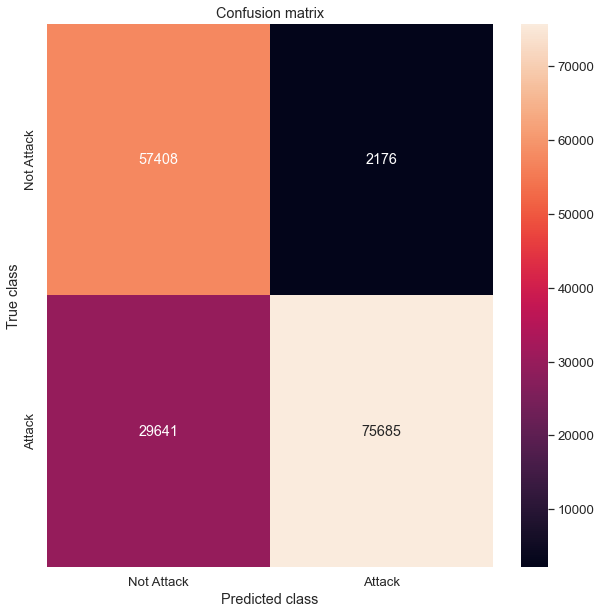

validation dataset



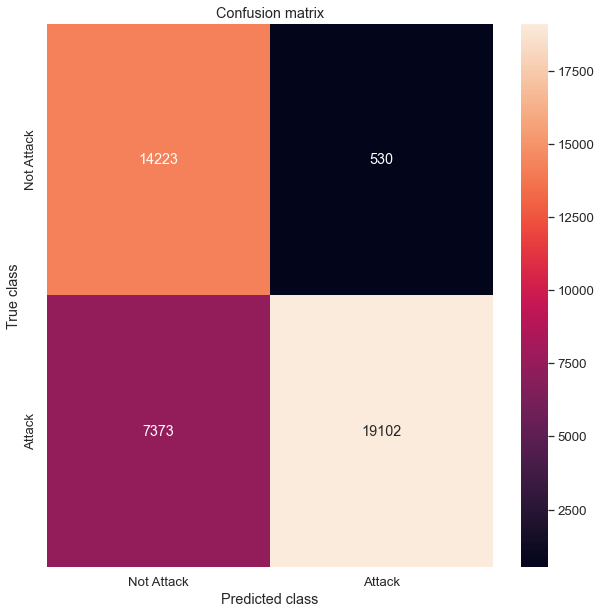

testing dataset



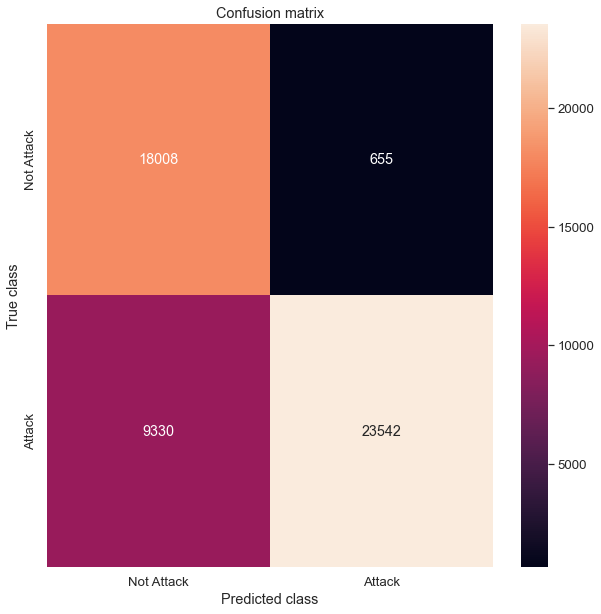

In [8]:
print('training dataset\n')
show_confusion_matrix(tr_df, tr_pred)
print('validation dataset\n')
show_confusion_matrix(val_df, val_pred)
print('testing dataset\n')
show_confusion_matrix(tt_df, tt_pred)